<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience1/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression (iphone_purchase)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
!gdown --id  1sFVv1Q1OvysqRGD0IRCoosbDSHg_w4-p

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sFVv1Q1OvysqRGD0IRCoosbDSHg_w4-p
To: /content/iphone_purchase_records.csv
100% 7.32k/7.32k [00:00<00:00, 30.7MB/s]


In [ ]:
# Step 1 - Load Data
dataset = pd.read_csv("iphone_purchase_records.csv")
dataset.sample(5)

,Gender,Age,Salary,Purchase Iphone
362,Female,47,50000,1
24,Male,46,23000,1
259,Female,45,131000,1
133,Female,21,68000,0
14,Male,18,82000,0


In [ ]:
dataset.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X[:4, :])

[['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ['Female' 27 57000]]


In [ ]:
# Step 2 - Convert Gender to number
labelEncoder_gender = LabelEncoder()
X[:, 0] = labelEncoder_gender.fit_transform(X[:, 0])
print(X[:4, :])

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 [0 27 57000]]


In [ ]:
# Optional - if you want to convert X to float data type
X = np.vstack(X[:, :]).astype(float)
print(X[:4, :])

[[1.0e+00 1.9e+01 1.9e+04]
 [1.0e+00 3.5e+01 2.0e+04]
 [0.0e+00 2.6e+01 4.3e+04]
 [0.0e+00 2.7e+01 5.7e+04]]


In [ ]:
# Step 3 - Split Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Step 4 - Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 5 - Logistic Regression Classifier
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Step 6 - Predict
y_pred = classifier.predict(X_test)

In [ ]:
# Step 7 - Confusion Matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy socre:", metrics.accuracy_score(y_test, y_pred))
print("Precisionn score:", metrics.precision_score(y_test, y_pred))
print("recall score:", metrics.recall_score(y_test, y_pred))

[[65  3]
 [ 6 26]]
Accuracy socre: 0.91
Precisionn score: 0.896551724137931
recall score: 0.8125


In [ ]:
# Step 8 - Make New Prediction
x1 = sc.transform([[1, 21, 40000]])
x2 = sc.transform([[1, 21, 80000]])
x3 = sc.transform([[0, 21, 40000]])
x4 = sc.transform([[0, 21, 80000]])
x5 = sc.transform([[1, 41, 40000]])
x6 = sc.transform([[1, 41, 80000]])
x7 = sc.transform([[0, 41, 40000]])
x8 = sc.transform([[1, 68, 80000]])
print("Ex: Male aged 21 making 40K will buy iphone:", classifier.predict(x1))

Ex: Male aged 21 making 40K will buy iphone: [0]


# Synthetic Example

In [8]:
# Step 1 - Import required modules
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay#, plot_confusion_matrix
import pandas as pd

In [11]:
# Step 2 - Generate the dataset
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)
print(X)
print(y)

[[-0.24880343]
 [-1.09843092]
 [-1.74527053]
 [-1.12567541]
 [-0.38369952]
 [-0.07793253]
 [ 0.9894434 ]
 [-0.75419153]
 [-1.34600052]
 [-0.4504149 ]
 [ 2.3231755 ]
 [-1.48342873]
 [-0.97685046]
 [-0.66689516]
 [ 2.41577001]
 [ 1.09178948]
 [ 1.50994311]
 [ 1.1361428 ]
 [ 2.48447901]
 [-1.86826541]
 [-1.85676294]
 [-2.20037076]
 [-0.40794499]
 [-1.13776173]
 [ 0.20429294]
 [-1.59209308]
 [ 0.76428923]
 [-1.09000692]
 [ 1.87030087]
 [ 1.5243197 ]
 [ 1.8521359 ]
 [-0.89678045]
 [ 0.51339488]
 [-0.39579829]
 [-1.0666602 ]
 [ 0.91977425]
 [ 1.26786591]
 [ 1.68648484]
 [ 1.48357451]
 [-0.33575793]
 [-1.26614411]
 [ 1.17586346]
 [-0.87383547]
 [ 1.42333474]
 [-0.84075703]
 [-1.10762407]
 [-1.12609209]
 [ 1.03552243]
 [ 1.96383951]
 [ 0.98878767]
 [ 0.75935737]
 [-0.38064323]
 [-0.84350841]
 [ 0.68208098]
 [-1.48045321]
 [ 1.81579789]
 [-1.62052339]
 [-0.35554633]
 [-0.44983599]
 [ 2.74692257]
 [-0.09980206]
 [ 0.95593915]
 [ 0.91841164]
 [-1.16945371]
 [ 0.15213117]
 [-0.88885893]
 [-0.92810

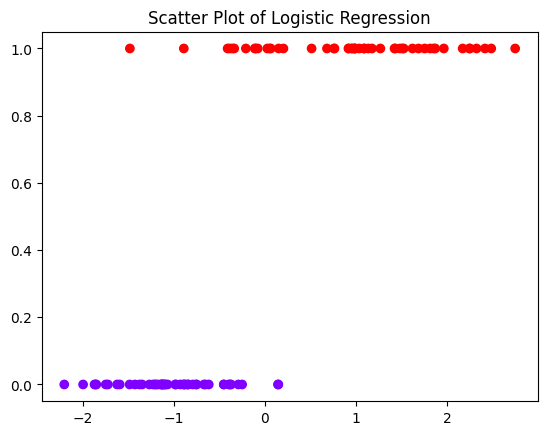

In [12]:
# Step 3 - Visualize te Data
# Creating a simple scatter plot to see what data looks like
plt.scatter(X, y, c=y, cmap="rainbow")
plt.title("Scatter Plot of Logistic Regression")
plt.show()

In [13]:
# Step 4 - Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Step 5 - Perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# logistic regression coefficient and intercept
print(log_reg.coef_) #w1
print(log_reg.intercept_) #w0

[[2.4081317]]
[0.70393417]


In [15]:
# Step 6 - Make prediction using the model
y_pred = log_reg.predict(X_test)

In [19]:
# Step 6 - Display the Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
# True Positive (upper-left) - Number of positives we predicted correctly
# True Negative (lower-right) - Number of negatives we predicted correctly
# False Positive (top-right) - Number of positives predicted incorrectly
# False Negative (lower-left) - Number of negatives predicted incorrectly

[[15  1]
 [ 2  7]]


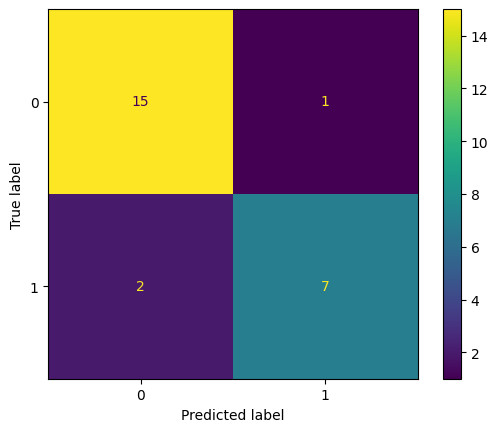

In [25]:
ConfusionMatrixDisplay(conf_mat).plot()

# Logistic Regression (Titanic_pydataset)

In [ ]:
# Import Statements